# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-pastel')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [30]:
df = pd.read_csv('heart.csv')

print("5 BARIS PERTAMA DATASET:")
print(df.head())

print("\nINFORMASI DATASET:")
df.info()

print("\nSTATISTIK DESKRIPTIF:")
print(df.describe())

print("\nJUMLAH MISSING VALUES PER KOLOM:")
print(df.isnull().sum())

5 BARIS PERTAMA DATASET:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

INFORMASI DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

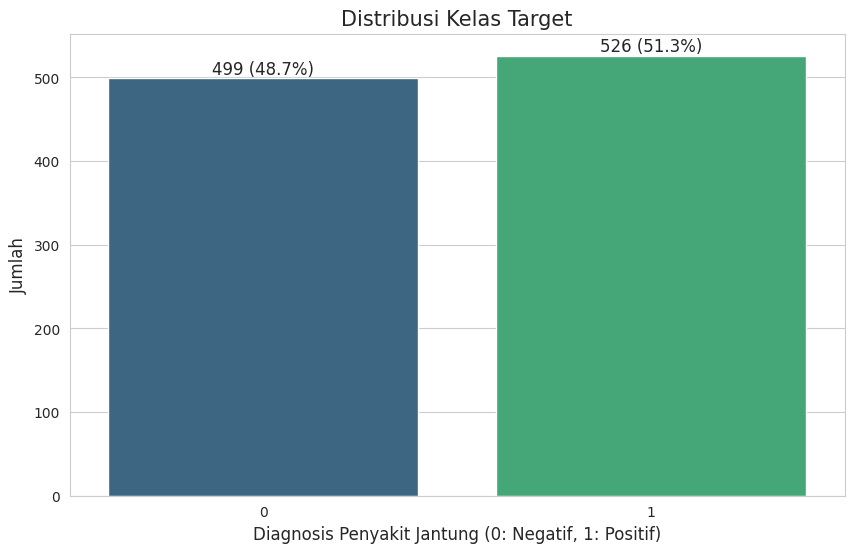

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribusi Kelas Target', fontsize=15)
plt.xlabel('Diagnosis Penyakit Jantung (0: Negatif, 1: Positif)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width()/2, height + 5,
            f'{int(height)} ({percentage:.1f}%)',
            ha='center', fontsize=12)

plt.show()

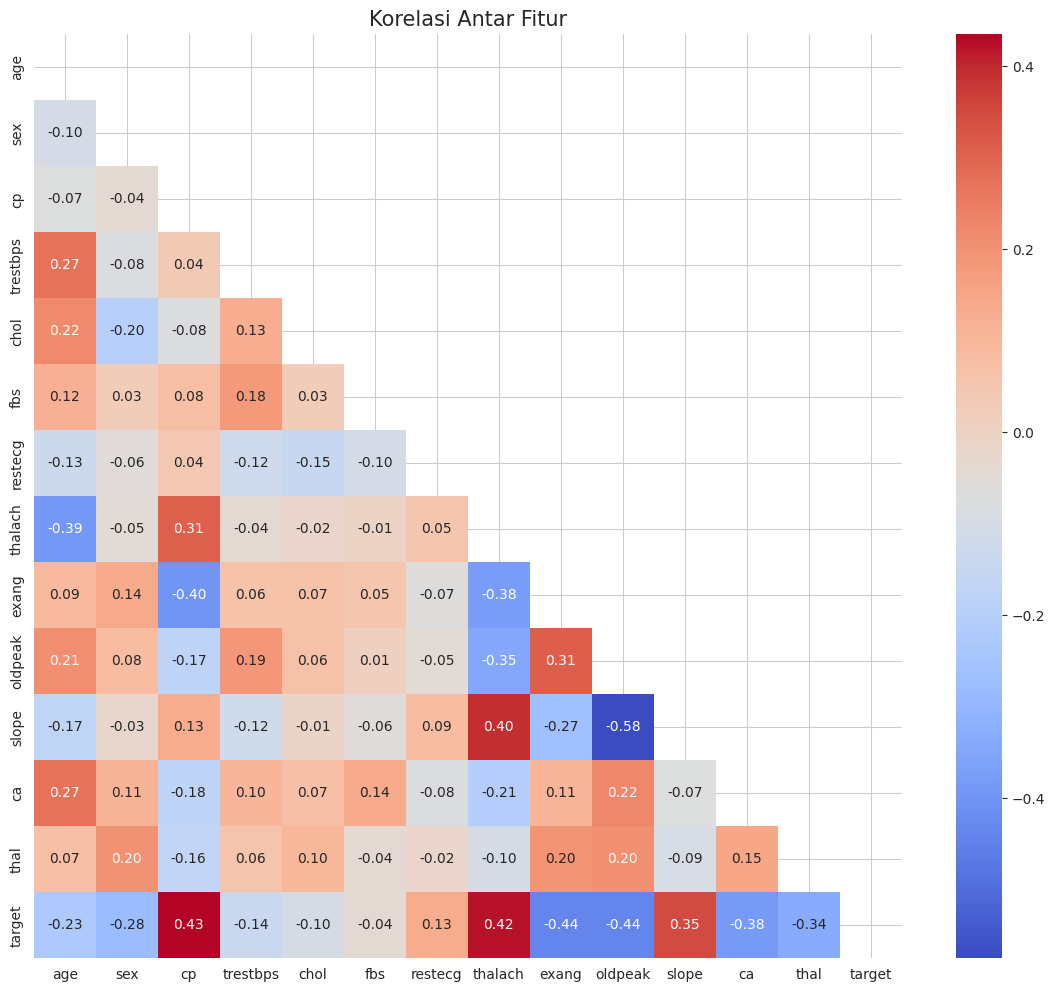

In [32]:
plt.figure(figsize=(14, 12))
correlation = df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Korelasi Antar Fitur', fontsize=15)
plt.show()

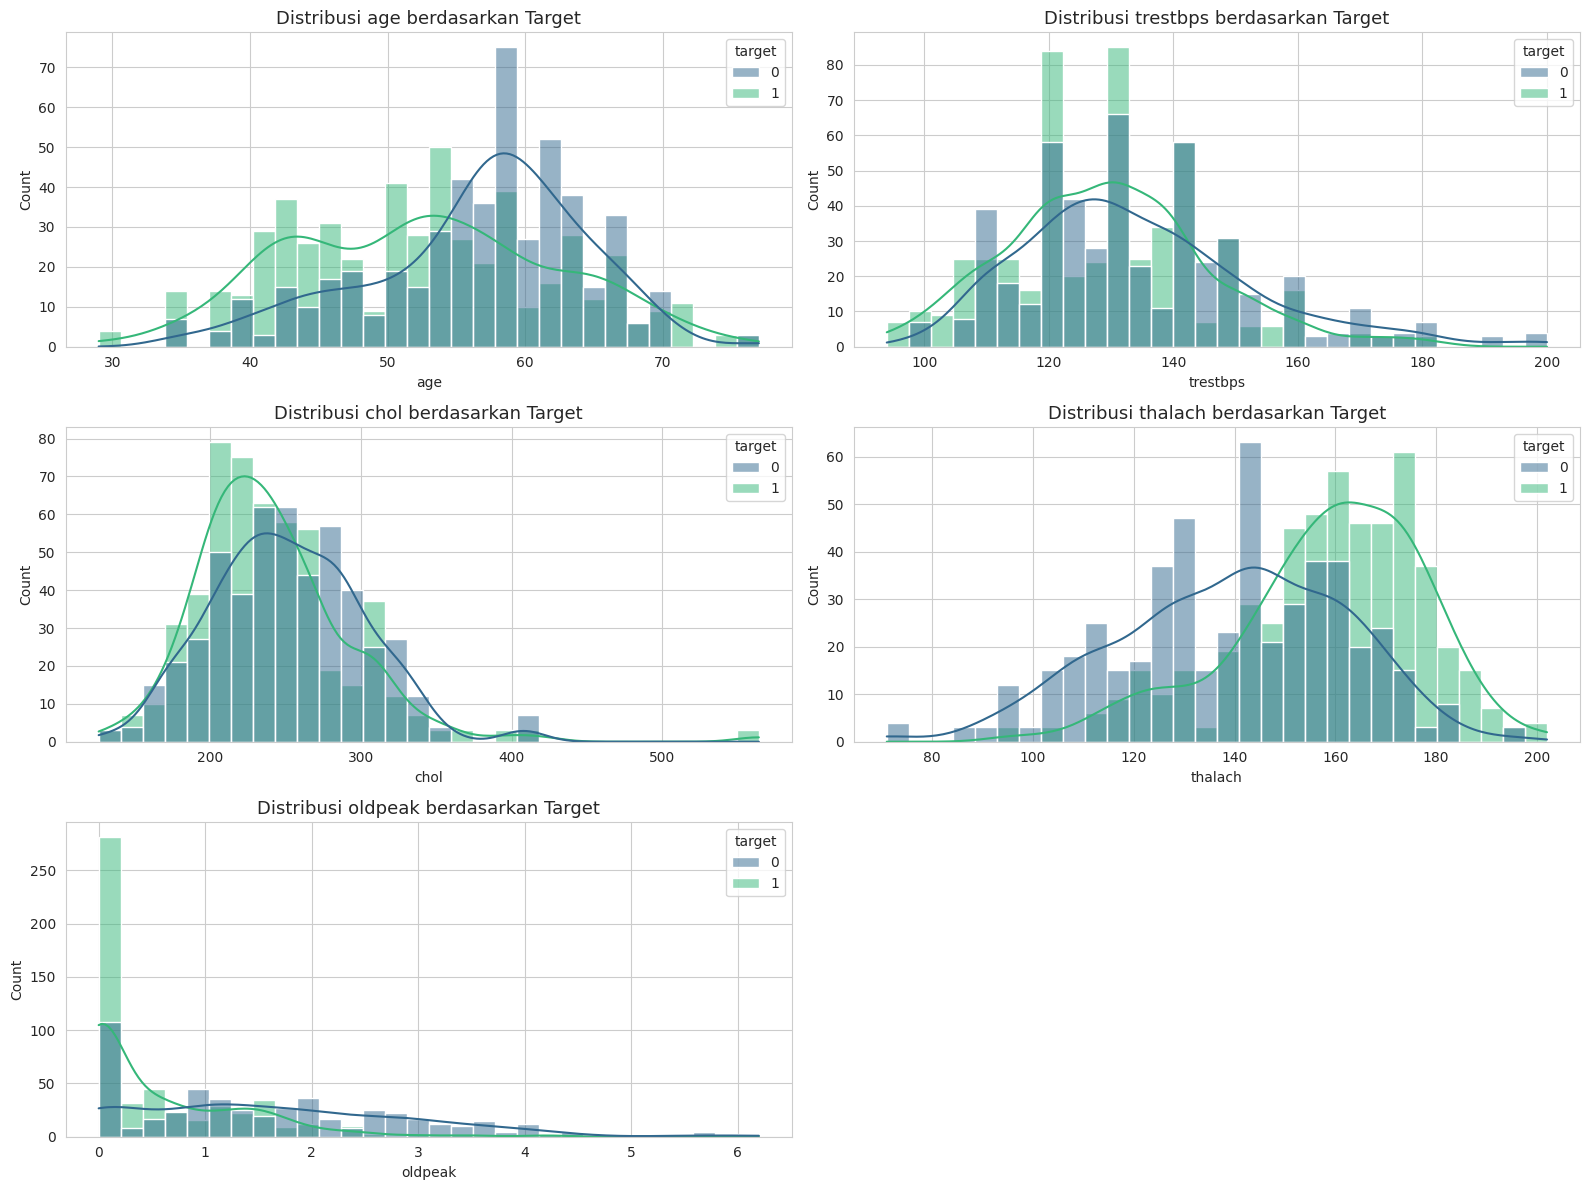

In [33]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=feature, hue='target', kde=True, bins=30, palette='viridis')
    plt.title(f'Distribusi {feature} berdasarkan Target', fontsize=13)
plt.tight_layout()
plt.show()

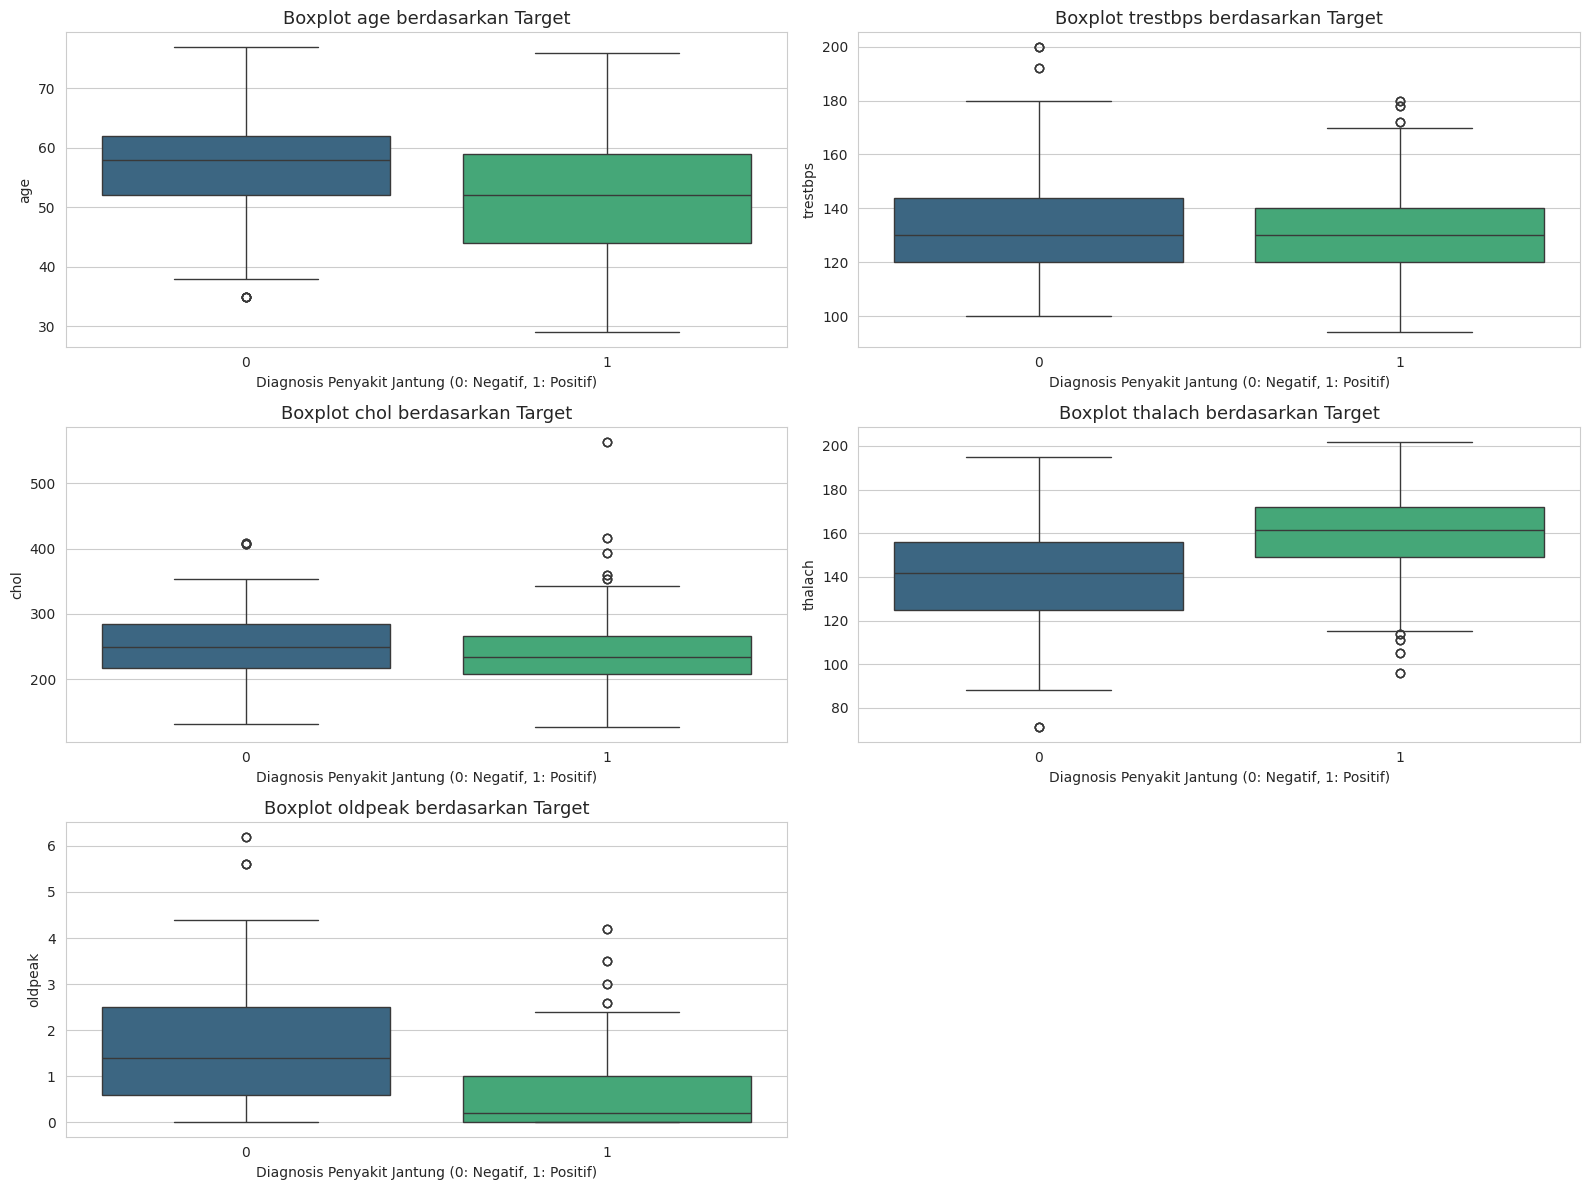

In [34]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='target', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot {feature} berdasarkan Target', fontsize=13)
    plt.xlabel('Diagnosis Penyakit Jantung (0: Negatif, 1: Positif)', fontsize=10)
plt.tight_layout()
plt.show()

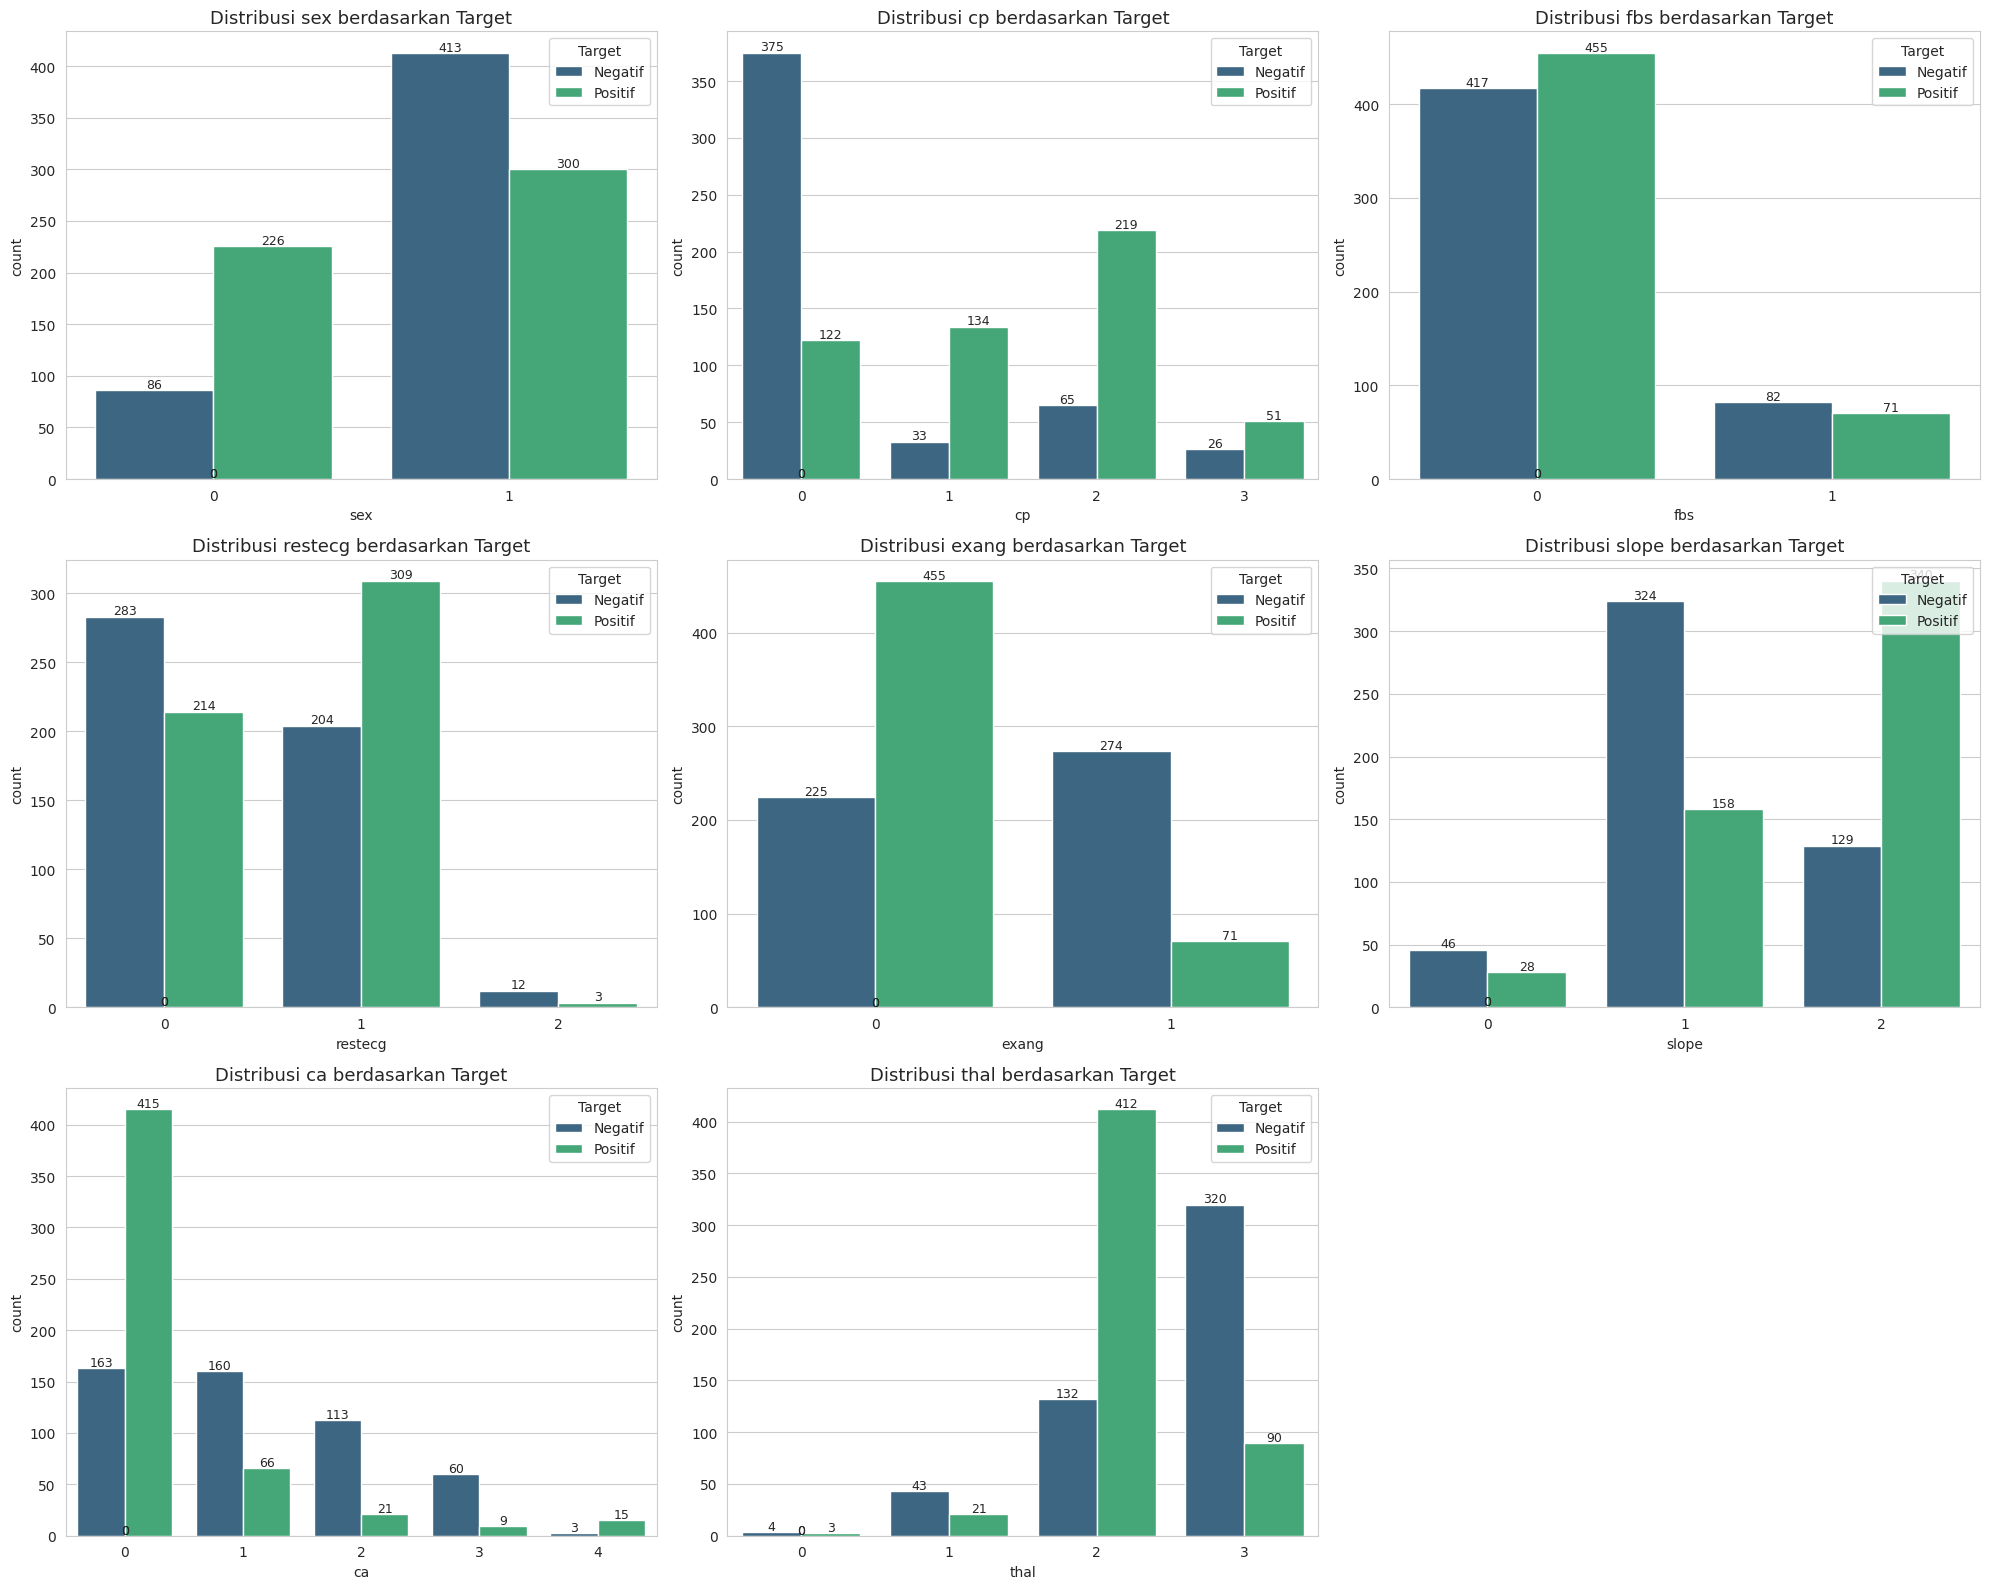

In [35]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(20, 16))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(x=feature, hue='target', data=df, palette='viridis')
    plt.title(f'Distribusi {feature} berdasarkan Target', fontsize=13)
    plt.xlabel(f'{feature}', fontsize=10)
    plt.legend(title='Target', loc='upper right', labels=['Negatif', 'Positif'])

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 2,
                f'{int(height)}',
                ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [36]:
print("\nANALISIS BIVARIATE UNTUK VARIABEL KATEGORIKAL:")
for feature in categorical_features:
    print(f"\nCrosstab untuk {feature}:")
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    print(crosstab)
    print("\nPersentase penyakit jantung berdasarkan kategori:")
    print(crosstab[1].sort_values(ascending=False))


ANALISIS BIVARIATE UNTUK VARIABEL KATEGORIKAL:

Crosstab untuk sex:
target          0          1
sex                         
0       27.564103  72.435897
1       57.924264  42.075736

Persentase penyakit jantung berdasarkan kategori:
sex
0    72.435897
1    42.075736
Name: 1, dtype: float64

Crosstab untuk cp:
target          0          1
cp                          
0       75.452716  24.547284
1       19.760479  80.239521
2       22.887324  77.112676
3       33.766234  66.233766

Persentase penyakit jantung berdasarkan kategori:
cp
1    80.239521
2    77.112676
3    66.233766
0    24.547284
Name: 1, dtype: float64

Crosstab untuk fbs:
target          0          1
fbs                         
0       47.821101  52.178899
1       53.594771  46.405229

Persentase penyakit jantung berdasarkan kategori:
fbs
0    52.178899
1    46.405229
Name: 1, dtype: float64

Crosstab untuk restecg:
target           0          1
restecg                      
0        56.941650  43.058350
1        39.7

<Figure size 1600x1200 with 0 Axes>

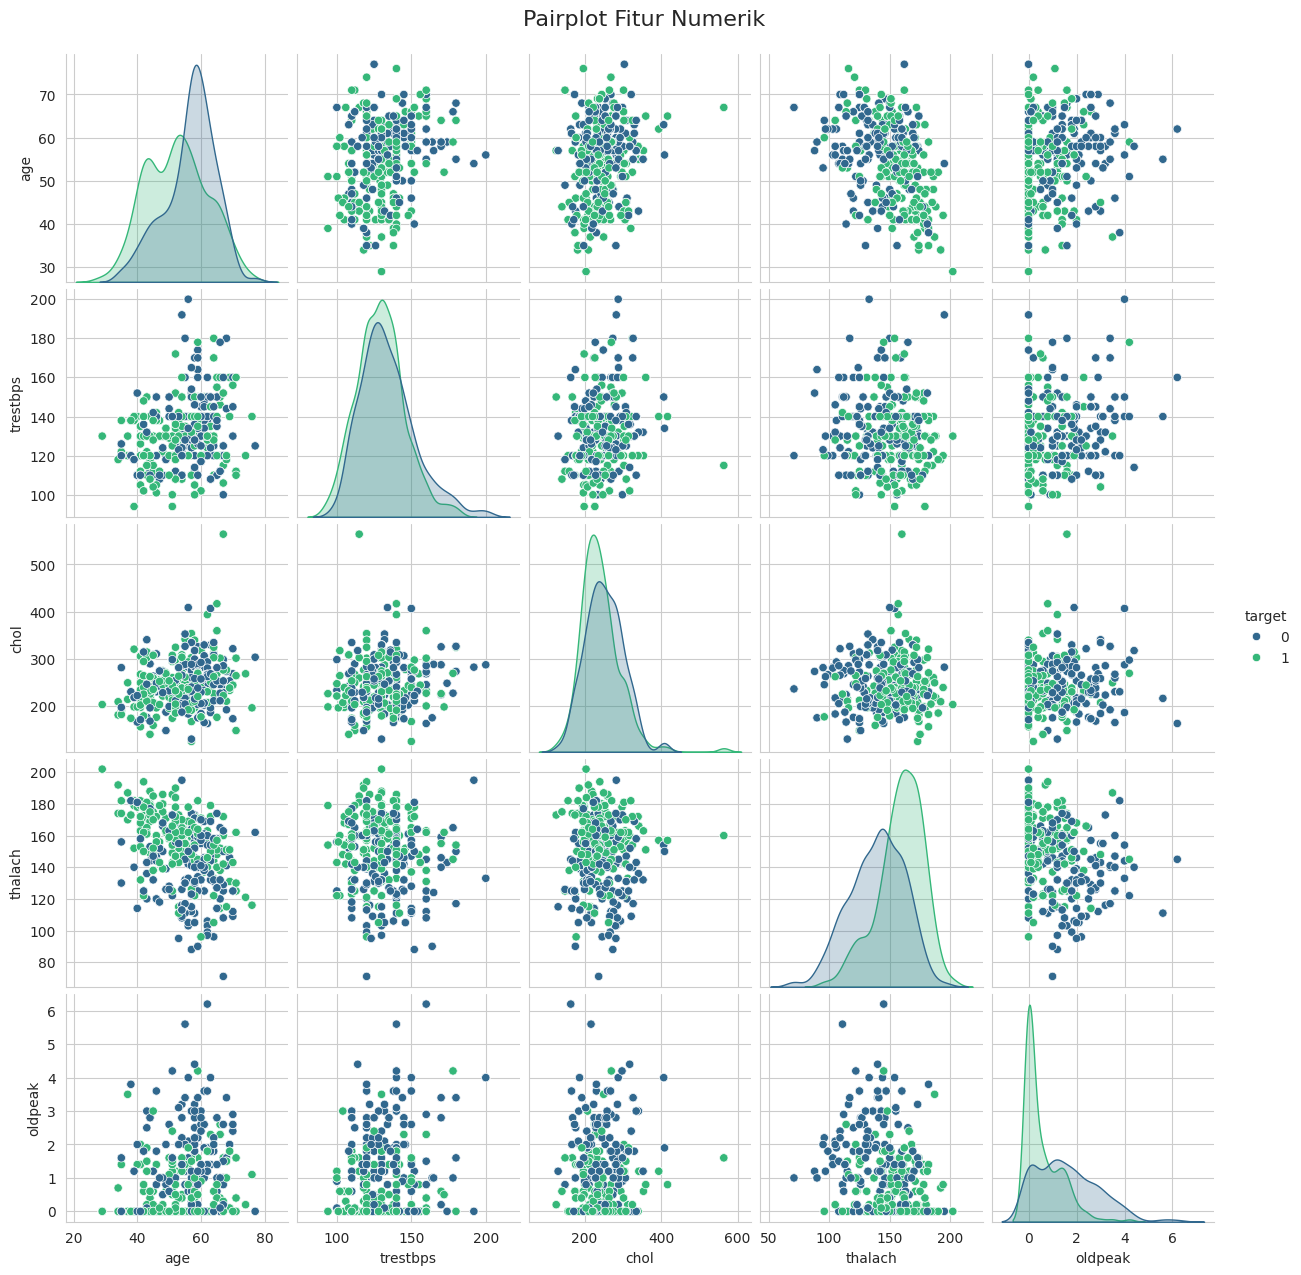

In [37]:
plt.figure(figsize=(16, 12))
sns.pairplot(df[numeric_features + ['target']], hue='target', palette='viridis')
plt.suptitle('Pairplot Fitur Numerik', y=1.02, fontsize=16)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [38]:
X = df.drop('target', axis=1)
y = df['target']

In [39]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [40]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nINFORMASI SPLITTING DATA:")
print(f"Ukuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")
print(f"Distribusi target di data training: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Distribusi target di data testing: {pd.Series(y_test).value_counts().to_dict()}")


INFORMASI SPLITTING DATA:
Ukuran data training: (820, 13)
Ukuran data testing: (205, 13)
Distribusi target di data training: {1: 421, 0: 399}
Distribusi target di data testing: {1: 105, 0: 100}


In [42]:
# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

# Create directories
os.makedirs('data/processed', exist_ok=True)

# Export datasets
X_train_df.to_csv('data/processed/X_train.csv', index=False)
X_test_df.to_csv('data/processed/X_test.csv', index=False)
pd.Series(y_train).to_csv('data/processed/y_train.csv', index=False, header=['target'])
pd.Series(y_test).to_csv('data/processed/y_test.csv', index=False, header=['target'])

# Export complete processed dataset
heart_processed = pd.concat([X_train_df, X_test_df], axis=0)
heart_processed['target'] = pd.concat([pd.Series(y_train), pd.Series(y_test)], axis=0)
heart_processed.to_csv('data/processed/heart_processed.csv', index=False)

print("🎉 PREPROCESSING SELESAI!")
print("📁 File yang dihasilkan:")
print(f"   - X_train.csv: {X_train_df.shape}")
print(f"   - X_test.csv: {X_test_df.shape}")
print(f"   - y_train.csv: {len(y_train)} samples")
print(f"   - y_test.csv: {len(y_test)} samples")
print(f"   - heart_processed.csv: {heart_processed.shape}")
print("✅ DATASETS EXPORTED SUCCESSFULLY!")

🎉 PREPROCESSING SELESAI!
📁 File yang dihasilkan:
   - X_train.csv: (820, 30)
   - X_test.csv: (205, 30)
   - y_train.csv: 820 samples
   - y_test.csv: 205 samples
   - heart_processed.csv: (1025, 31)
✅ DATASETS EXPORTED SUCCESSFULLY!
